In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
MAR_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/MAR_predictions_RFC.csv", index_col=0)


In [3]:
MAR_predictions.head()

,Date,Predictions
0,2019-07-31,0
1,2019-06-28,0
2,2019-05-31,1
3,2019-04-30,1
4,2019-03-29,0


In [4]:
MAR_predictions.Date = pd.to_datetime(MAR_predictions.Date, format="%Y-%m-%d")

In [5]:
MAR_predictions['Predictions'] = MAR_predictions['Predictions'].shift(-1)


In [6]:
MAR_predictions = MAR_predictions.dropna()


In [7]:
MAR_predictions = MAR_predictions[::-1]

In [8]:
MAR_predictions.head(10)

,Date,Predictions
112,2010-03-31,1.0
111,2010-04-30,0.0
110,2010-05-28,0.0
109,2010-06-30,0.0
108,2010-07-30,1.0
107,2010-08-31,1.0
106,2010-09-30,1.0
105,2010-10-29,1.0
104,2010-11-30,1.0
103,2010-12-31,0.0


In [9]:
MAR_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/MAR/MAR_monthly.csv", index_col =0)

In [10]:
MAR_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
MAR_predictions = MAR_predictions.set_index("Date")

In [12]:
MAR_monthly.tail()

,Open,High,Low,Close,Volume
2000-01-31,31.563,34.750,30.1880,31.063,25538100
1999-12-31,32.813,34.250,29.9380,31.563,24289900
1999-11-30,33.750,36.250,31.4403,32.563,33680700
1999-10-29,31.750,33.938,31.6880,33.688,26051000
1999-09-30,34.188,34.875,30.8130,32.688,18002100


In [13]:
MAR_final_df = pd.merge(MAR_predictions, MAR_monthly, right_index=True, left_index=True)

In [14]:
MAR_final_df.index = pd.to_datetime(MAR_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

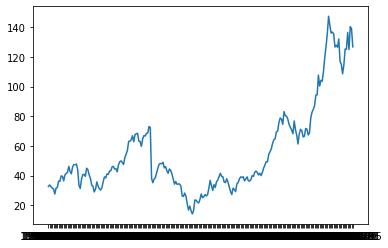

In [16]:
plt.plot(MAR_monthly.index[::-1], MAR_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] and (position.is_short != True) == 0.0 :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(MAR_final_df, Binary_Classification_1d, cash=10000, commission=.02)
bt.run()



Start                          2010-03-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        3409 days 00:00:00
Exposure [%]                                     0
Equity Final [$]                           39471.1
Equity Peak [$]                            41821.4
Return [%]                                 294.711
Buy & Hold Return [%]                       341.18
Max. Drawdown [%]                         -34.4247
Avg. Drawdown [%]                         -12.7734
Max. Drawdown Duration           818 days 00:00:00
Avg. Drawdown Duration           292 days 00:00:00
# Trades                                         0
Win Rate [%]                                   NaN
Best Trade [%]                                 NaN
Worst Trade [%]                                NaN
Avg. Trade [%]                                 NaN
Max. Trade Duration                            NaT
Avg. Trade Duration                            NaT
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/MAR_RFC_Equity.csv")

In [25]:
df

,Equity
2010-04-30,10000.000000
2010-05-28,10000.000000
2010-06-30,10000.000000
2010-07-30,10000.000000
2010-08-31,9076.433121
2010-09-30,10170.078454
2010-10-29,10516.366361
2010-11-30,11129.466262
2010-12-31,11790.819397
2011-01-31,11208.942176
